# Single Station Stacking

This notebook assumes that you have gone through the database creation and
can start using the traces at you disposal.

## Load a station into an RFStream

The autoreload extension is already loaded. To reload it, use:
  %reload_ext autoreload


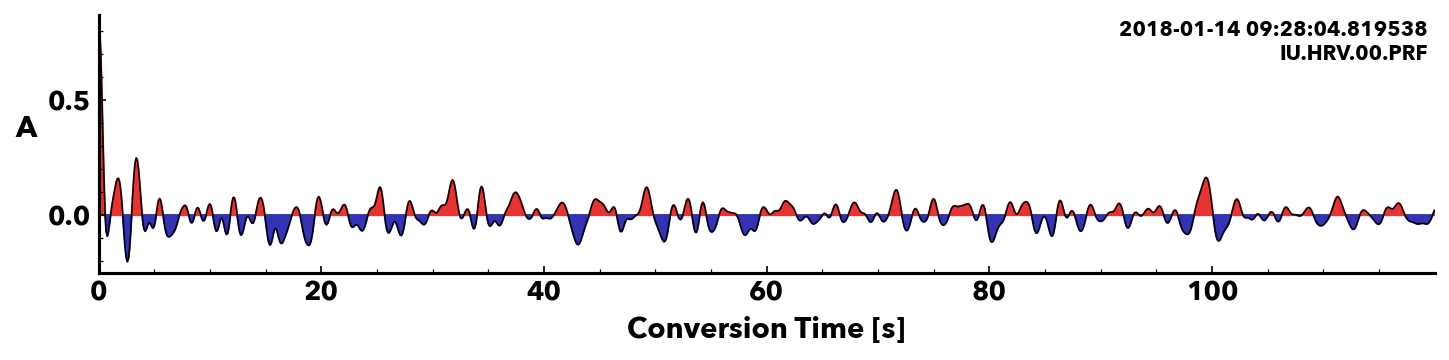

In [16]:
%load_ext autoreload
%autoreload 2

from pyglimer.rf.create import read_rf
from pyglimer.plot.plot_utils import set_mpl_params
set_mpl_params()

rfst = read_rf("database/RF/P/IU/HRV/*.sac")

# Check traces
rfst[0].plot()

# Backazimuthal and rayparameter distribution

To get a good overview of the stations data, 
it's often beneficial to see where your data 
is coming from. 
A quicklook of over the spatial distribution 
is provided but the function `RFStream.plot_rb_dist()`,
which plots the distributiton of backazimuths and 
rayparameters in the stream.

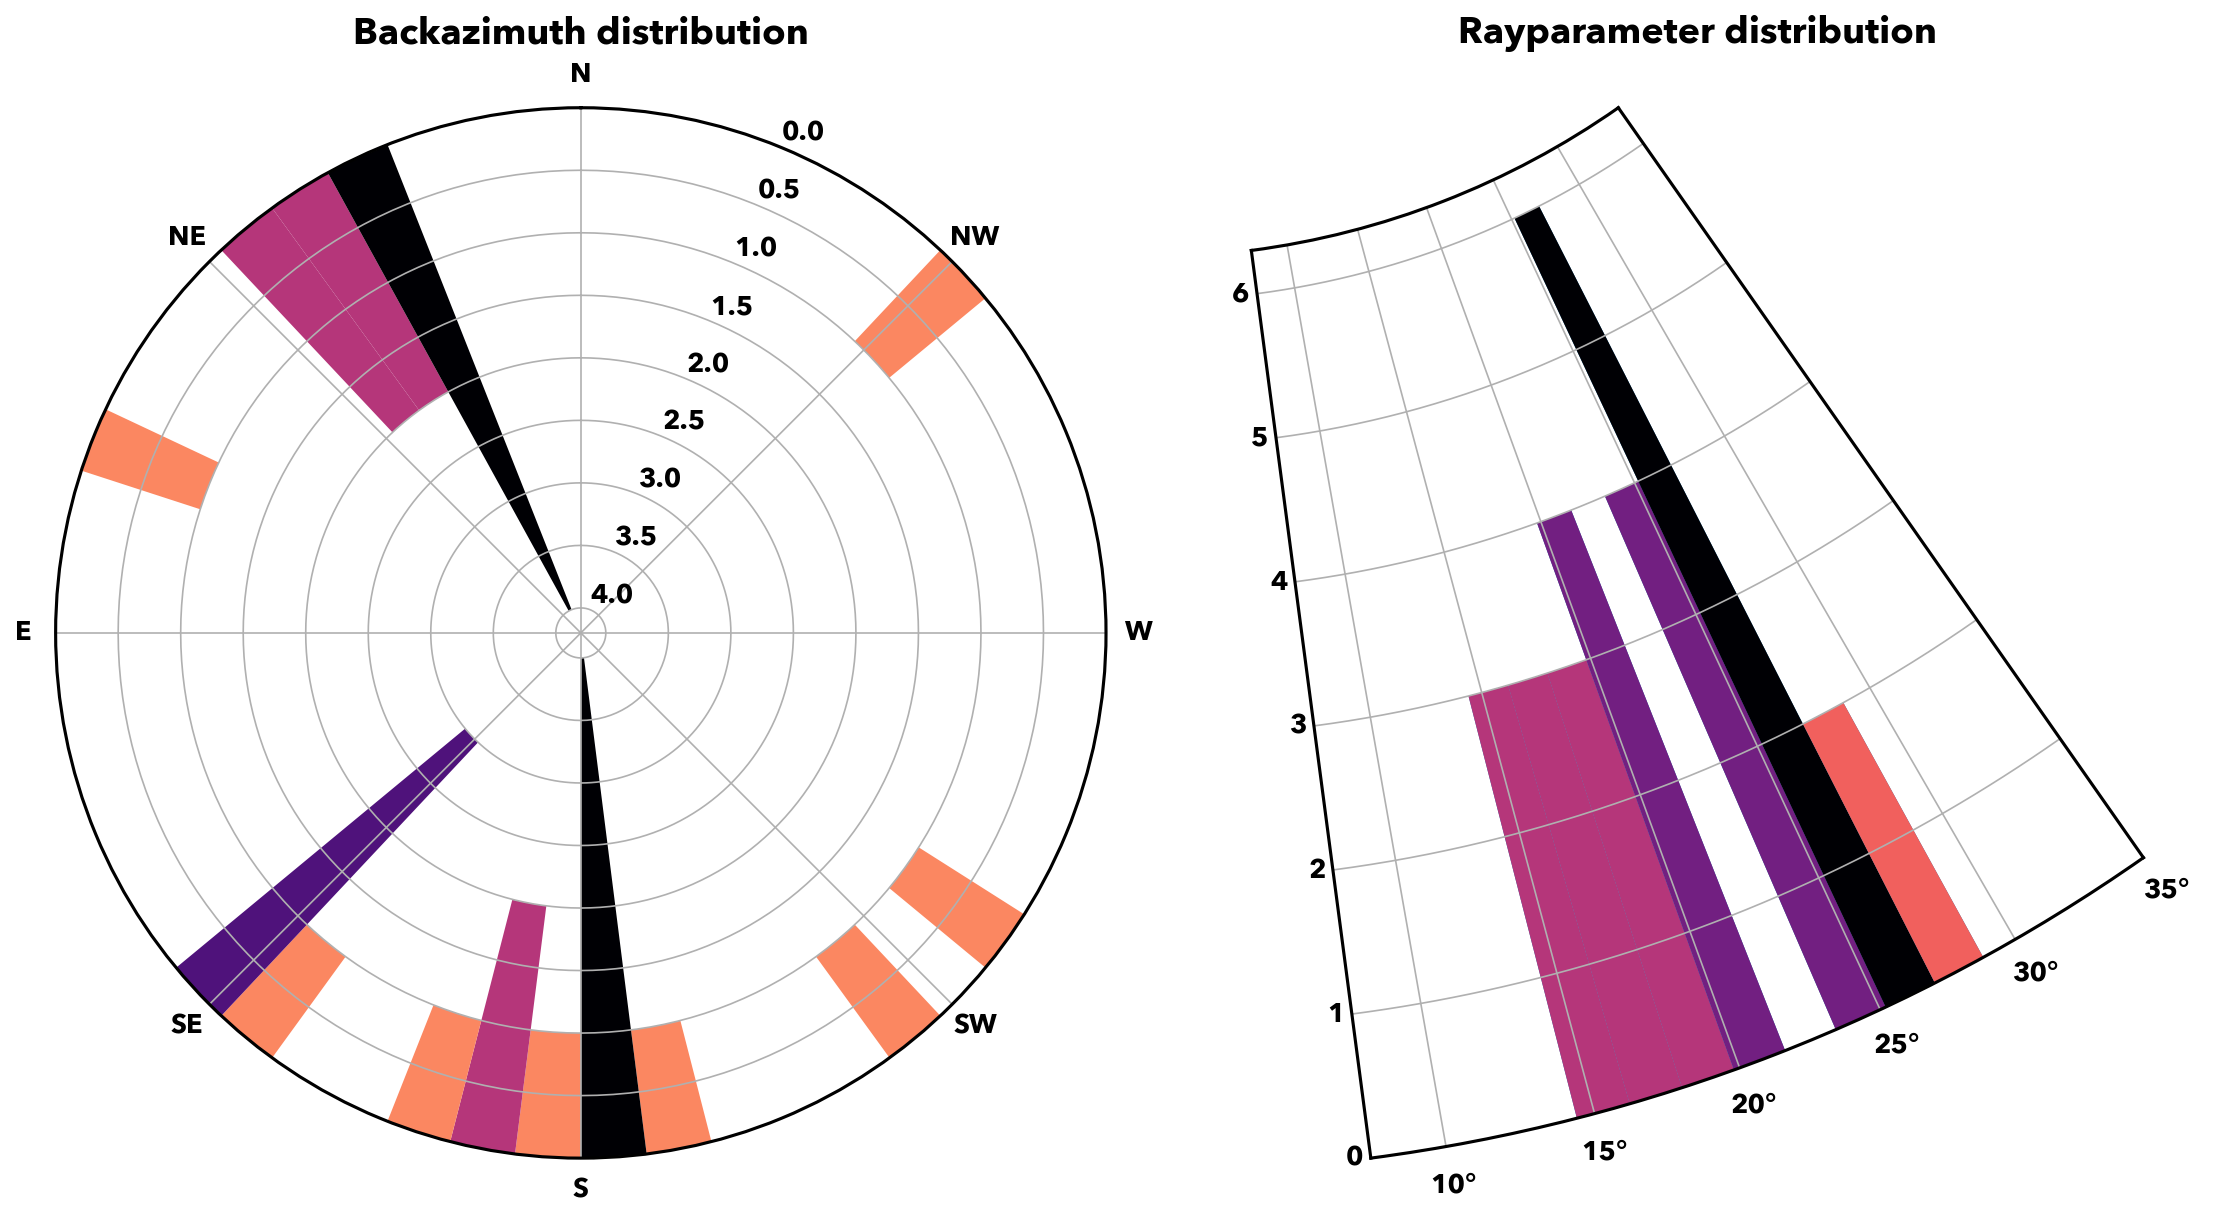

In [4]:
# Check distribtution
rfst.plot_rb_dist()

## Moveout Correction

To stack the receiver functions, we need to perform moveout correction. To do this we use a
built-in velocity model. Here, `iasp91.dat`.

---
***NOTE:***
It is currently loaded from within the repo, therefore we change the path and back before doing anything.

---

In [12]:
import os
from pyglimer import RFStream 
from utils.helper import chdir

rfst.moveout = chdir(rfst.moveout)
rfst.moveout(rfst, "iasp91.dat")

(array([  0.00000000e+00,   5.00000000e-01,   1.00000000e+00, ...,
          7.49000000e+02,   7.49500000e+02,   7.50000000e+02]),
 25 Trace(s) in Stream:

Prf time IU.HRV.00.PRF | -30.0s - 120.0s onset:2018-01-14T09:28:34.849764Z | 10.0 Hz, 1501 samples | mag:7.1 dist:58.1 baz:183.6 slow:7.00
...
(23 other traces)
...
Prf time IU.HRV.00.PRF | -30.0s - 120.0s onset:2018-11-30T17:38:07.507123Z | 10.0 Hz, 1501 samples | mag:7.1 dist:48.5 baz:321.0 slow:7.69

[Use "print(Stream.__str__(extended=True))" to print all Traces])

## Creating a single station stack

In [17]:
from utils.helper import chdir

rfst.station_stack = chdir(rfst.station_stack)
stack = rfst.station_stack(rfst)

In [18]:
print(stack)

(array([  0.00000000e+00,   5.00000000e-01,   1.00000000e+00, ...,
         7.49000000e+02,   7.49500000e+02,   7.50000000e+02]), <pyglimer.rf.create.RFTrace object at 0x7fc99aef3d60>, <pyglimer.rf.create.RFStream object at 0x7fc99bca5910>)


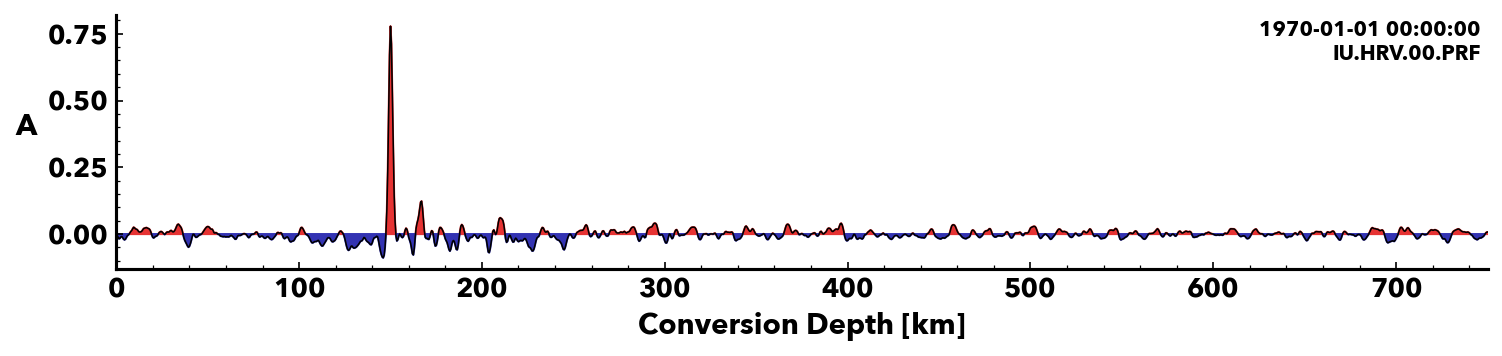

In [19]:
stack[1].plot(depth=stack[0])

In [11]:
stack[0]

array([  0.00000000e+00,   5.00000000e-01,   1.00000000e+00, ...,
         7.49000000e+02,   7.49500000e+02,   7.50000000e+02])

In [11]:
pwd

'/Users/lucassawade'

In [ ]:
os.cha